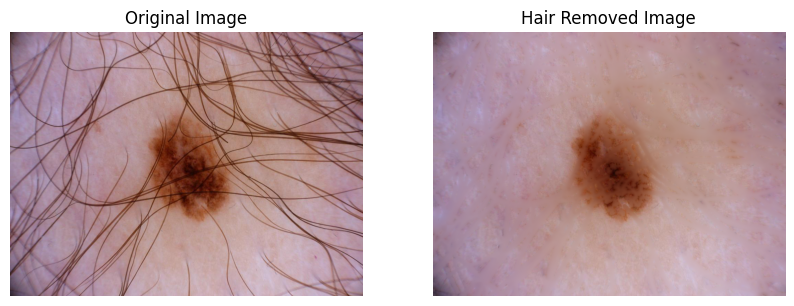

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hair_remove(image):
    # Convert image to grayScale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply GaussianBlur to smooth the image for better hair detection
    gray_blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # Apply MORPH_BLACKHAT to find dark regions (hairs) in the image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    blackhat = cv2.morphologyEx(gray_blurred, cv2.MORPH_BLACKHAT, kernel)
    
    # Use binary thresholding to isolate hairs
    _, hair_mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

    # Dilate the hair mask to cover the hair more completely
    dilated_hair_mask = cv2.dilate(hair_mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=2)
    
    # Inpaint the original image using the dilated hair mask
    inpainted_image = cv2.inpaint(image, dilated_hair_mask, 50, cv2.INPAINT_TELEA)
    
    return inpainted_image


# Load the image
image_path = r'C:\Users\FARABI\Desktop\Study Materials\Thesis\Datasets\25k_images\ISIC_0000095_downsampled.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV format) to RGB (for display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply the hair removal function
result_image = hair_remove(image_rgb)

# Display the original and the hair-removed image using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title("Hair Removed Image")
plt.axis('off')

plt.show()
